In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_theme(style="whitegrid")

In [2]:
df = pd.read_csv("StudentsPerformance.csv", sep=";")

In [3]:
df

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75
...,...,...,...,...,...,...,...,...
995,female,group E,master's degree,standard,completed,88,99,95
996,male,group C,high school,free/reduced,none,62,55,55
997,female,group C,high school,free/reduced,completed,59,71,65
998,female,group D,some college,standard,completed,68,78,77


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


In [5]:
df.isnull().sum()

gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64

In [6]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
math score,1000.0,66.089,15.163080,0.0,57.00,66.0,77.0,100.0
reading score,1000.0,69.169,14.600192,17.0,59.00,70.0,79.0,100.0
writing score,1000.0,68.054,15.195657,10.0,57.75,69.0,79.0,100.0


<Axes: ylabel='math score'>

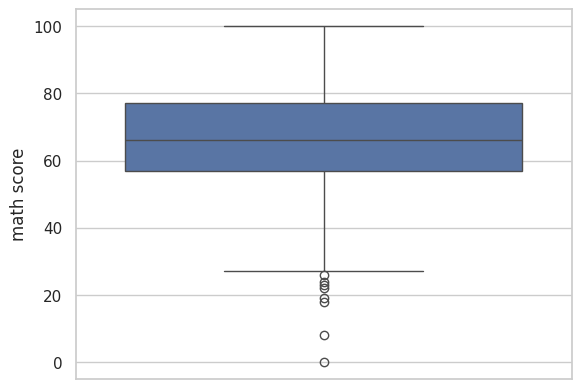

In [7]:
sns.boxplot(y=df["math score"])

In [8]:
df_corr = df[["math score", "reading score", "writing score"]].corr()

<Axes: >

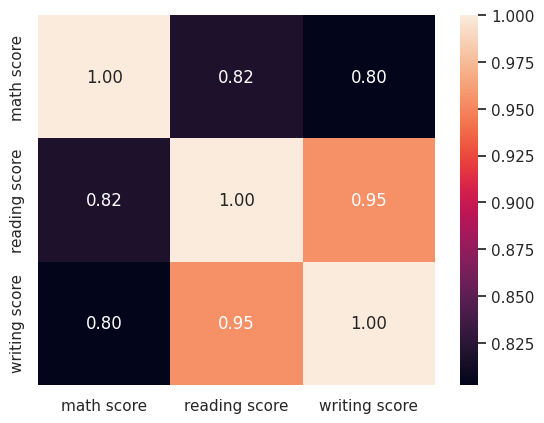

In [9]:
sns.heatmap(df_corr, annot=True, fmt=".2f")

In [10]:
dis = df[["math score", "reading score", "writing score"]]

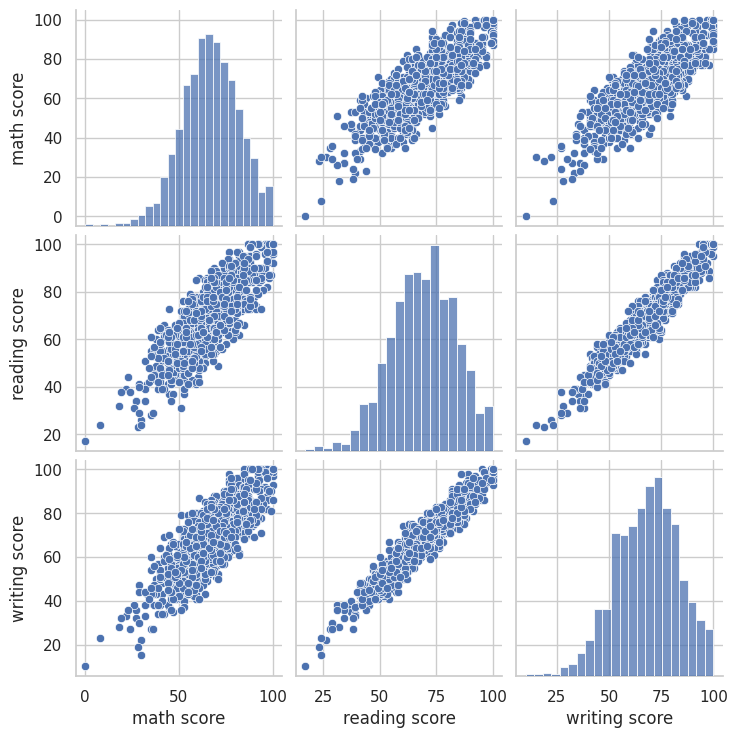

In [11]:
sns.pairplot(dis)

TypeError: subplot() takes 1 or 3 positional arguments but 2 were given

<Figure size 640x480 with 0 Axes>

In [16]:
dis.columns

Index(['math score', 'reading score', 'writing score'], dtype='object')

In [19]:
data = dis
data["avg"] = (
    1 / 3 * (data["math score"] + data["reading score"] + data["writing score"])
)

/tmp/ipykernel_4705/4012250786.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data["avg"] = 1/3*(data["math score"] + data["reading score"] + data["writing score"])


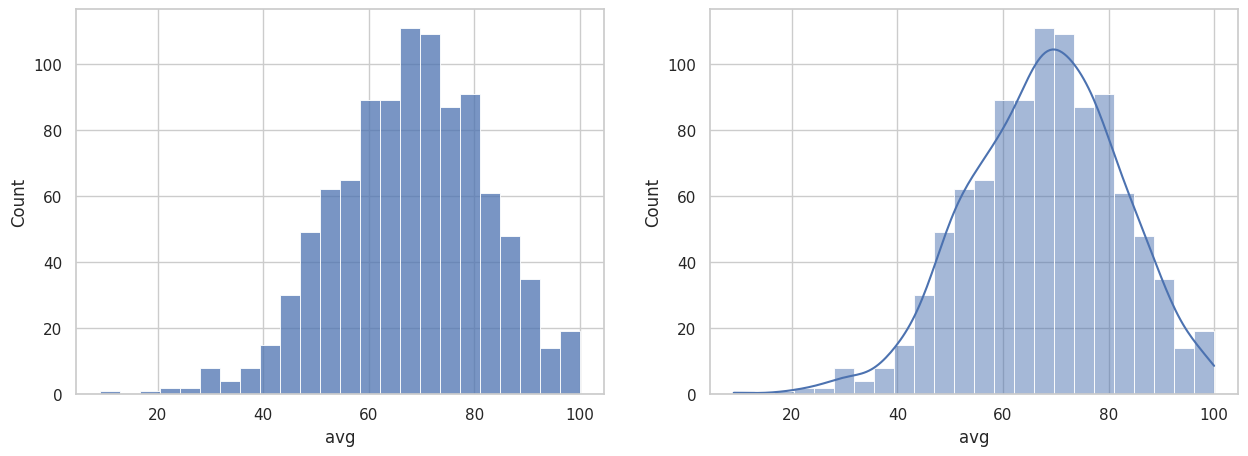

In [36]:
fig, ax = plt.subplots(1, 2)
plt.subplot(121)
sns.histplot(data, x="avg")
plt.subplot(122)
sns.histplot(data, x="avg", kde=True)
fig.set_size_inches(15, 5)
plt.show()

In [44]:
data = df[["gender", "math score", "reading score", "writing score"]]
data["avg"] = (
    1 / 3 * (data["math score"] + data["reading score"] + data["writing score"])
)

/tmp/ipykernel_4705/1058686500.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data["avg"] = (


In [45]:
fig, ax = plt.subplots(1, 2)
plt.subplot(121)
sns.histplot(data, x="avg")
plt.subplot(122)
sns.histplot(
    data,
    x="avg",
    kde=True,
)
fig.set_size_inches(15, 5)
plt.show()

,gender,math score,reading score,writing score,avg
0,female,72,72,74,72.666667
1,female,69,90,88,82.333333
2,female,90,95,93,92.666667
3,male,47,57,44,49.333333
4,male,76,78,75,76.333333
...,...,...,...,...,...
995,female,88,99,95,94.000000
996,male,62,55,55,57.333333
997,female,59,71,65,65.000000
998,female,68,78,77,74.333333


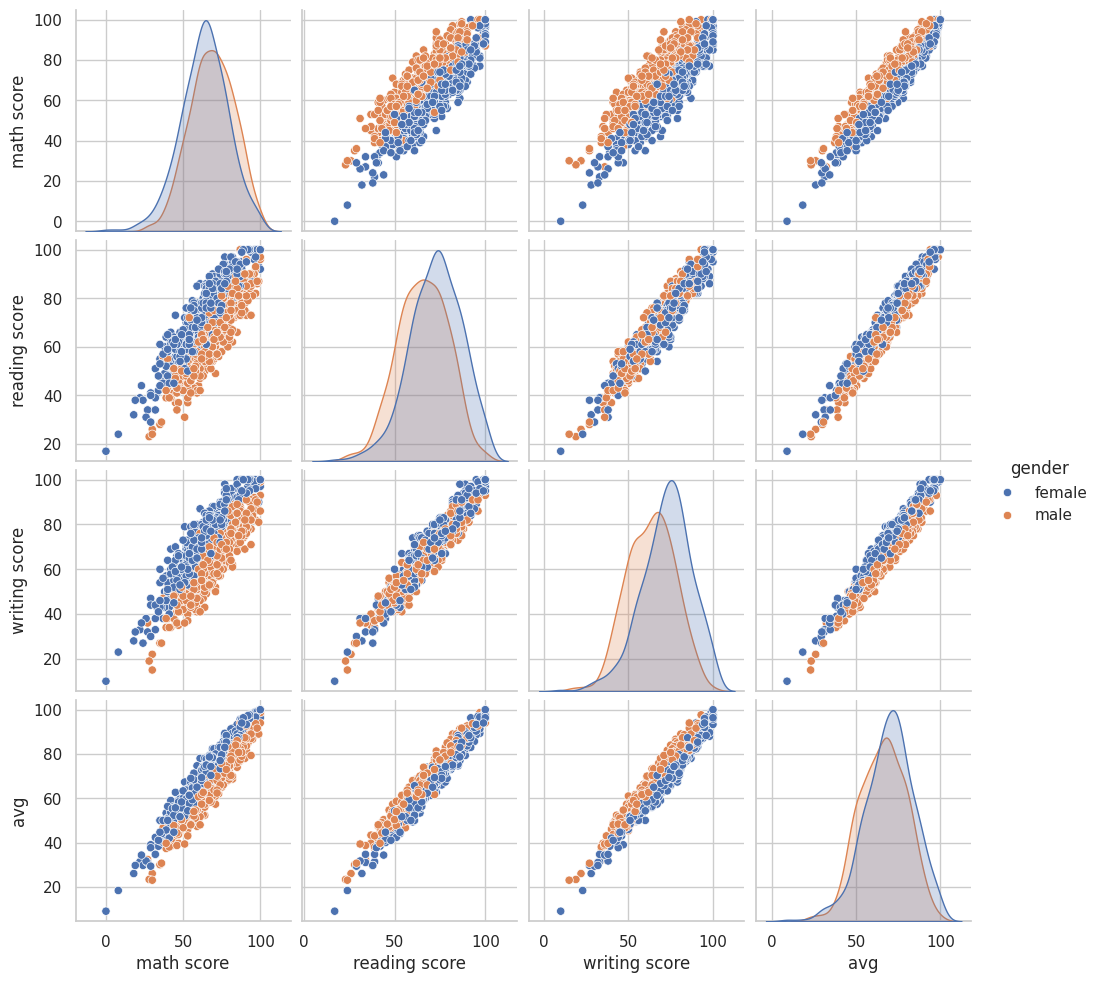

In [47]:
sns.pairplot(data, hue="gender")